In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.python.ops import array_ops

from influence.plot_utils import show_graph
from models.smooth_hinge import SmoothedSupportVector
from models.hyperplane_clf import BinaryLogisticRegression

## Logistic Regression (Digits)

In [3]:
df_digits = pd.read_csv('data/digits_14.csv')[:400]
n = len(df_digits)
X = df_digits.values[:, 0:256]
y = df_digits.values[:, -1].reshape(n, 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
for data in [X_train, X_test, y_train, y_test]:
    print(data.shape)
n, p = X_train.shape

(240, 256)
(160, 256)
(240, 1)
(160, 1)


In [9]:
tf.reset_default_graph()
model = BinaryLogisticRegression(
    model_name='logistic_regression',
    eta=0.0001,
)
model.fit(X_train, y_train, n_iter=50, verbose=10)
y_hat = model.predict(X_train)

Step 0: loss = 0.69314748 (0.034 sec)


In [16]:
%%time
I_loss_bf = model.influence_loss(
    X_test, y_test, method='cg', tol=1.0)

Fetch training loss gradients (0.114 sec)
CG Objective: 0.95412254
CG Objective: -12.8716545
Optimization terminated successfully.
         Current function value: -12.871655
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
CG Objective: -15.900978
CG Objective: -24.68406
Optimization terminated successfully.
         Current function value: -24.684059
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
CG Objective: 3.9851532
Optimization terminated successfully.
         Current function value: 3.985153
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
         Hessian evaluations: 1
CG Objective: -27.510864
CG Objective: -45.762344
Optimization terminated successfully.
         Current function value: -45.762344
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
      

CG Objective: -580.1754
CG Objective: -660.43536
CG Objective: -756.15466
CG Objective: -808.41455
CG Objective: -873.1387
CG Objective: -929.771
CG Objective: -929.772
Optimization terminated successfully.
         Current function value: -929.771973
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 18
         Hessian evaluations: 6343
CG Objective: 0.16944122
CG Objective: -12.74394
Optimization terminated successfully.
         Current function value: -12.743940
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
CG Objective: -11.698048
CG Objective: -23.91531
Optimization terminated successfully.
         Current function value: -23.915310
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
CG Objective: -4.320429
CG Objective: -15.888692
Optimization terminated successfully.
         Current function value

CG Objective: -663.62604
CG Objective: -1502.2883
CG Objective: -2108.2998
CG Objective: -2750.1333
CG Objective: -3041.6206
CG Objective: -3177.304
CG Objective: -3393.994
CG Objective: -3394.003
Optimization terminated successfully.
         Current function value: -3394.002930
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 21
         Hessian evaluations: 7442
CG Objective: -5.177845
Optimization terminated successfully.
         Current function value: -5.177845
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
         Hessian evaluations: 1
CG Objective: -31.66753
Optimization terminated successfully.
         Current function value: -31.667530
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
         Hessian evaluations: 1
CG Objective: -16.215523
Optimization terminated successfully.
         Current function value: -16.215523
         Iterations: 1
         

CG Objective: -16.722212
Optimization terminated successfully.
         Current function value: -16.722212
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
CG Objective: 2.6931534
CG Objective: -11.695026
Optimization terminated successfully.
         Current function value: -11.695026
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
CG Objective: -11.901684
CG Objective: -18.286976
Optimization terminated successfully.
         Current function value: -18.286976
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
CG Objective: -5.0097084
CG Objective: -15.807594
Optimization terminated successfully.
         Current function value: -15.807594
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
CG Objective: 

CG Objective: -26.002491
Optimization terminated successfully.
         Current function value: -26.002491
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
CG Objective: -71.865944
CG Objective: -1453.2848
CG Objective: -3844.5723
CG Objective: -7879.1924
CG Objective: -12459.336
CG Objective: -20971.48
CG Objective: -35544.31
CG Objective: -40592.58
         Current function value: -40592.578125
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 17
         Hessian evaluations: 11832
CG Objective: -26.702215
Optimization terminated successfully.
         Current function value: -26.702215
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
         Hessian evaluations: 1
CG Objective: -32.737053
CG Objective: -57.396187
Optimization terminated successfully.
         Current function value: -57.396187
         Iterations: 2
         Function e

In [20]:
I_loss_bf

array([[  0.27878642,   4.78425694,  21.2007637 , ..., -10.0820303 ,
          4.8814826 , -12.31844616],
       [ 16.67103004,  20.21500397,  11.87602043, ...,   1.79686868,
         12.43580723,  11.42191124],
       [ 13.73879147,  30.11081123,   7.68553162, ...,  -6.53315878,
          6.14029074,   8.86256695],
       ...,
       [ 16.17224693,  -3.54037952,  25.7231102 , ...,  34.42508698,
         18.88136292,  48.38847733],
       [ 20.77633286,   7.78946114,  18.86489868, ...,  16.27783775,
         13.4987545 ,  21.64424706],
       [  9.45267868,  23.78710556,   4.34412098, ...,  -2.11574912,
          5.99525166,  -0.8508687 ]])

In [27]:
%%time
I_loss_loo = model.leave_one_out_refit(
    X_test, y_test, n_iter=1000, force_restart=True)

LOO Fold 0: loss = -0.61211455 (0.724 sec)


KeyboardInterrupt: 

## Logistic Regression (Simulated data)

In [4]:
df = pd.read_csv('data/hyperplane_10.csv')
n = len(df)
X = df.values[:, 0:10]
y = df.values[:, -1].reshape(n, 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
for data in [X_train, X_test, y_train, y_test]:
    print(data.shape)
n, p = X_train.shape

(80, 10)
(20, 10)
(80, 1)
(20, 1)


In [5]:
tf.reset_default_graph()
model = BinaryLogisticRegression(
    model_name='logistic_regression',
    eta=0.1,
)
model.fit(X_train, y_train, n_iter=1000)
y_hat = model.predict(X_train)

Step 0: loss = 0.69314718 (0.028 sec)


In [6]:
np.mean(y_hat == y_train)

0.9625

In [7]:
%%time
I_loss_bf = model.influence_loss(
    X_test, y_test, method='brute-force')

Fetch training loss gradients (0.051 sec)
CPU times: user 79.3 ms, sys: 8.6 ms, total: 87.9 ms
Wall time: 62 ms


In [8]:
%%time
I_loss_loo = model.leave_one_out_refit(
    X_test, y_test, n_iter=1000, force_restart=True)

LOO Fold 0: loss = 0.12017248 (0.500 sec)
LOO Fold 8: loss = 0.11525055 (0.450 sec)
LOO Fold 16: loss = 0.13204129 (0.581 sec)
LOO Fold 24: loss = 0.13218744 (0.580 sec)
LOO Fold 32: loss = 0.13096559 (0.457 sec)
LOO Fold 40: loss = 0.12850387 (0.460 sec)
LOO Fold 48: loss = 0.13249128 (0.479 sec)
LOO Fold 56: loss = 0.13199851 (0.470 sec)
LOO Fold 64: loss = 0.13210185 (0.463 sec)
LOO Fold 72: loss = 0.13193966 (0.465 sec)
CPU times: user 51.9 s, sys: 7.99 s, total: 59.9 s
Wall time: 38.3 s


"\naxes[1,1].update({\n    'title':'Colored & Translated by different Validation Points',\n    'yticks': []})\n_ = axes[1,2].update({\n    'title':'Colored & Translated by different Validation Points',\n    'yticks': []})\n"

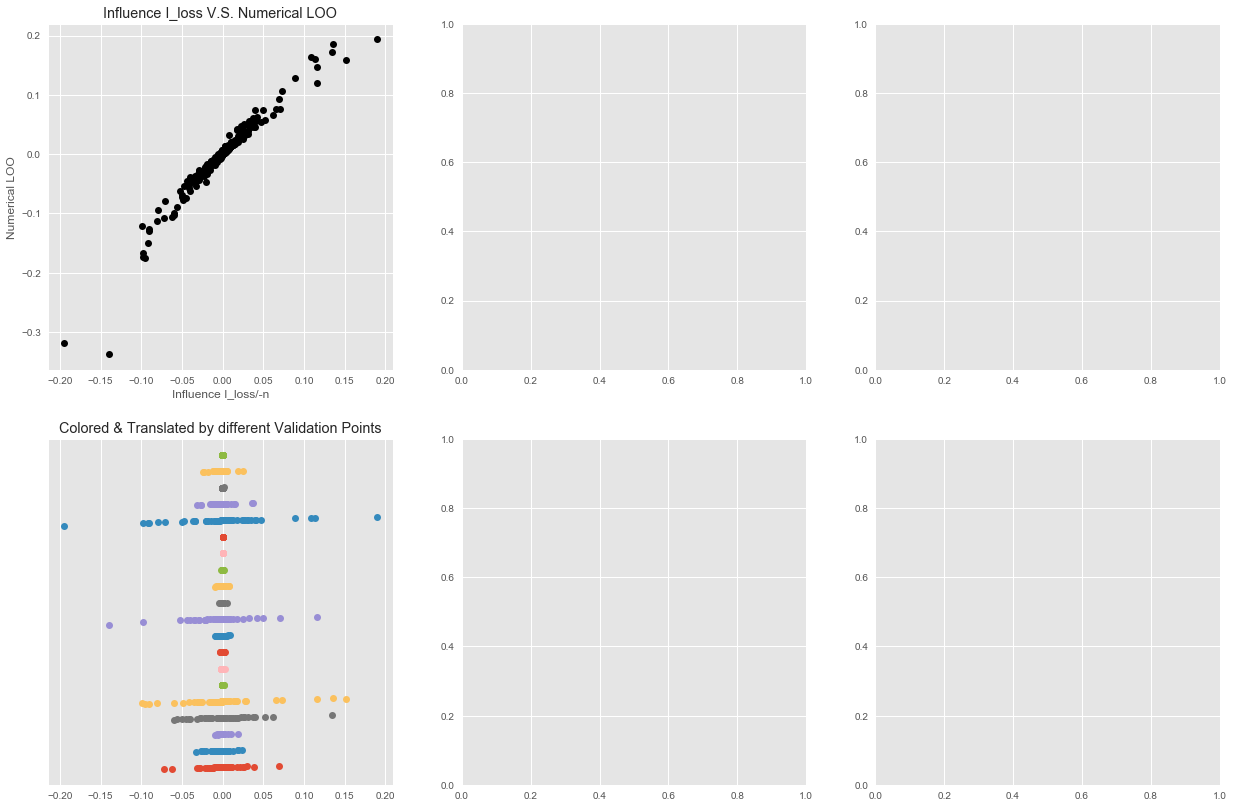

In [9]:
fig, axes = plt.subplots(2, 3 ,figsize=(21,14))
n_tr, _ = X_train.shape
n_te, _ = X_test.shape

for j in range(n_te):
    axes[0,0].plot(I_loss_bf[:,j]/(-n_tr), I_loss_loo[:,j], 
                 'o', color='black')
    axes[1,0].plot(I_loss_bf[:,j]/(-n_tr), I_loss_loo[:,j]+j, 'o')
    """
    axes[0,1].plot(I_loss_bf[j,:]/(-n_tr), loo_loss_cf[j,:], 
                 'o', color='black')
    axes[0,2].plot(I_loss_loo[j,:], loo_loss_cf[j,:], 
                 'o', color='black')
    
    axes[1,0].plot(I_loss_bf[j,:]/(-n_tr), I_loss_loo[j,:]+j, 'o')
    axes[1,1].plot(I_loss_bf[j,:]/(-n_tr), loo_loss_cf[j,:]+j, 'o')
    axes[1,2].plot(I_loss_loo[j,:], loo_loss_cf[j,:]+j, 'o')
    """

axes[0,0].update({
    'title':'Influence I_loss V.S. Numerical LOO',
    'xlabel': 'Influence I_loss/-n',
    'ylabel': 'Numerical LOO'})
"""
axes[0,1].update({
    'title':'Influence I_loss V.S. Closeform LOO',
    'xlabel': 'Influence I_loss/-n',
    'ylabel': 'Closeform LOO'})
axes[0,2].update({
    'title':'Numerical LOO V.S. Closeform LOO',
    'xlabel': 'Numerical LOO',
    'ylabel': 'Closeform LOO'})
"""
axes[1,0].update({
    'title':'Colored & Translated by different Validation Points',
    'yticks': []})
"""
axes[1,1].update({
    'title':'Colored & Translated by different Validation Points',
    'yticks': []})
_ = axes[1,2].update({
    'title':'Colored & Translated by different Validation Points',
    'yticks': []})
"""

## Support Vector

In [26]:
tf.reset_default_graph()
model = SmoothedSupportVector(
    model_name='SVM',
    eta=0.1,
    C=1.0,
    t=0.1
)
model.fit(X_train, y_train, n_iter=3000)
y_hat = model.predict(X_train)

Step 0: loss = 2.18280602 (0.095 sec)
Step 1000: loss = 0.21857318 (0.001 sec)
Step 2000: loss = 0.21857312 (0.001 sec)


In [27]:
np.mean(y_hat == y_train)

0.975

In [6]:
show_graph(tf.get_default_graph())

In [28]:
%%time
I_loss_bf = model.influence_loss(
    X_test, y_test, method='brute-force')

Fetch training loss gradients (0.123 sec)
CPU times: user 169 ms, sys: 19.9 ms, total: 189 ms
Wall time: 140 ms


In [29]:
%%time
I_loss_loo = model.leave_one_out_refit(
    X_test, y_test, n_iter=1000)

LOO Fold 0: loss = 0.22037229 (0.694 sec)
LOO Fold 8: loss = 0.21366465 (1.216 sec)
LOO Fold 16: loss = 0.22037233 (0.589 sec)
LOO Fold 24: loss = 0.22037236 (0.647 sec)
LOO Fold 32: loss = 0.22037233 (0.583 sec)
LOO Fold 40: loss = 0.21908718 (0.578 sec)
LOO Fold 48: loss = 0.21991396 (0.675 sec)
LOO Fold 56: loss = 0.22037233 (0.705 sec)
LOO Fold 64: loss = 0.22009292 (0.676 sec)
LOO Fold 72: loss = 0.22037204 (0.606 sec)
CPU times: user 1min 10s, sys: 9.68 s, total: 1min 20s
Wall time: 53.4 s


"\naxes[1,1].update({\n    'title':'Colored & Translated by different Validation Points',\n    'yticks': []})\n_ = axes[1,2].update({\n    'title':'Colored & Translated by different Validation Points',\n    'yticks': []})\n"

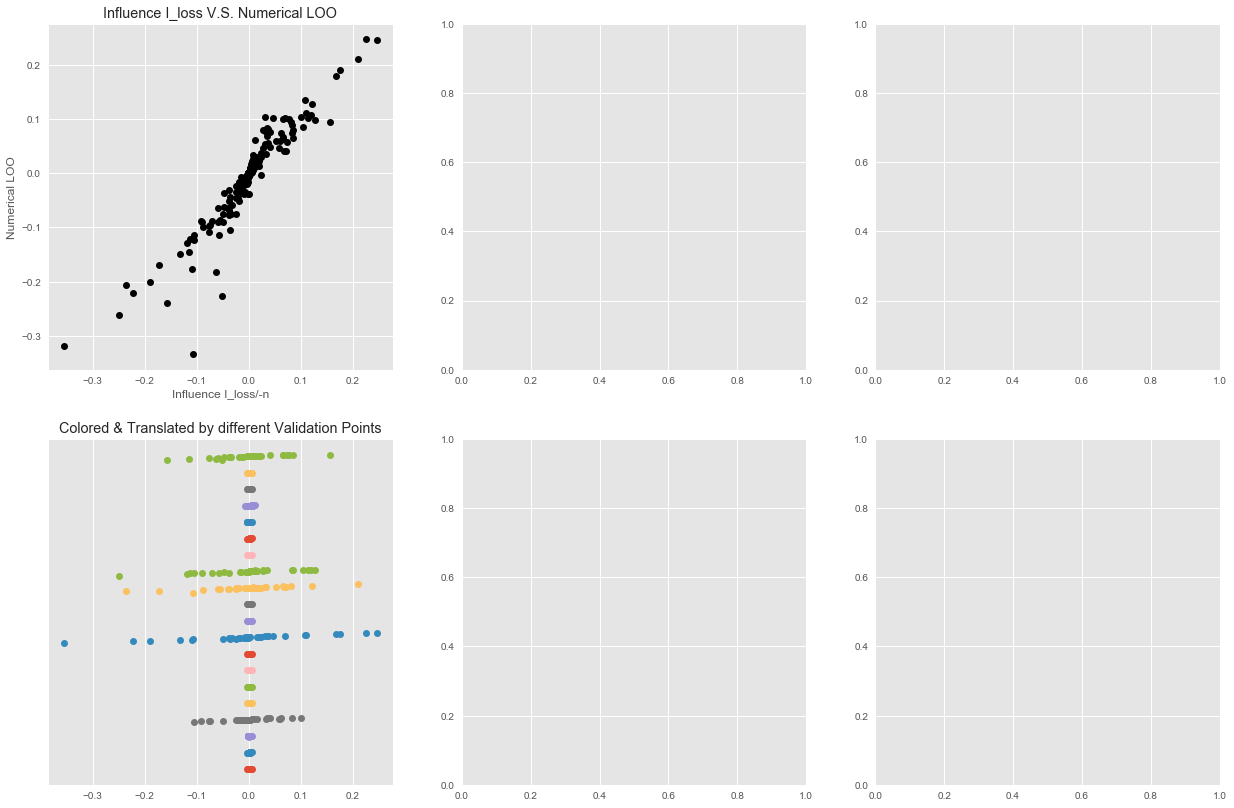

In [30]:
fig, axes = plt.subplots(2, 3 ,figsize=(21,14))
n_tr, _ = X_train.shape
n_te, _ = X_test.shape

for j in range(n_te):
    axes[0,0].plot(I_loss_bf[:,j]/(-n_tr), I_loss_loo[:,j], 
                 'o', color='black')
    axes[1,0].plot(I_loss_bf[:,j]/(-n_tr), I_loss_loo[:,j]+j, 'o')
    """
    axes[0,1].plot(I_loss_bf[j,:]/(-n_tr), loo_loss_cf[j,:], 
                 'o', color='black')
    axes[0,2].plot(I_loss_loo[j,:], loo_loss_cf[j,:], 
                 'o', color='black')
    
    axes[1,0].plot(I_loss_bf[j,:]/(-n_tr), I_loss_loo[j,:]+j, 'o')
    axes[1,1].plot(I_loss_bf[j,:]/(-n_tr), loo_loss_cf[j,:]+j, 'o')
    axes[1,2].plot(I_loss_loo[j,:], loo_loss_cf[j,:]+j, 'o')
    """

axes[0,0].update({
    'title':'Influence I_loss V.S. Numerical LOO',
    'xlabel': 'Influence I_loss/-n',
    'ylabel': 'Numerical LOO'})
"""
axes[0,1].update({
    'title':'Influence I_loss V.S. Closeform LOO',
    'xlabel': 'Influence I_loss/-n',
    'ylabel': 'Closeform LOO'})
axes[0,2].update({
    'title':'Numerical LOO V.S. Closeform LOO',
    'xlabel': 'Numerical LOO',
    'ylabel': 'Closeform LOO'})
"""
axes[1,0].update({
    'title':'Colored & Translated by different Validation Points',
    'yticks': []})
"""
axes[1,1].update({
    'title':'Colored & Translated by different Validation Points',
    'yticks': []})
_ = axes[1,2].update({
    'title':'Colored & Translated by different Validation Points',
    'yticks': []})
"""

In [17]:
I_loss_bf[:,1]

array([ 0.06552231,  0.06552231, -1.16356516,  1.43717623,  0.05966347,
        0.06552231,  0.14405772,  0.00998015,  0.02829183,  0.06552231,
        0.06552231,  0.85928822,  0.06552231,  0.06552231, -0.38279334,
        0.06552231,  0.06552231,  0.06552231, -0.44708052,  1.07995892,
       -0.0507368 ,  0.06552231,  0.0621195 ,  0.06552231,  0.06552231,
        0.78221524,  0.57792693,  0.06552231,  0.06552231,  0.06552231,
        0.06552231, -0.49915522,  0.06552231,  0.06552231,  0.06552231,
        0.06552231,  0.06552231,  0.0744978 ,  0.06552231,  0.06552231,
        0.03207684,  0.06552231,  0.06552231,  0.09122239,  0.06490124,
        0.06552231,  0.06552231, -1.74563849,  0.06357865,  0.06552231,
        0.06552231,  0.06552231,  0.06552147,  0.06552231,  0.06546637,
       -0.85436285,  0.06552231,  0.06552231,  0.06552231,  0.06552231,
        0.06552231,  0.06552231,  0.06552231,  0.06552231,  0.0655058 ,
       -0.82278454,  0.06552231,  0.06552231,  0.0517019 , -0.48